# **Time Series**

In [1]:
!pip install statsmodels pmdarima
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
df = pd.read_csv('../data/processed/Madrid_pollutants.csv')
clean_df = pd.read_csv('../data/processed/factorize_csv/madrid_fct.csv')

In [4]:
clean_df.shape

(53931, 8)

In [5]:
df.shape

(53931, 34)

In [6]:
# Supongamos que tienes un DataFrame df1 y has eliminado una columna llamada 'columna_eliminada' Puedes recuperar la columna eliminada de df1 de la siguiente manera
columna_recuperada = df['FECHA']

# Luego, supongamos que tienes otro DataFrame df2 al que deseas agregar la columna recuperada
# Puedes agregarla usando la función concat de pandas
clean_df['FECHA'] = columna_recuperada

# Ahora, df2 contiene la columna recuperada de df1 como 'columna_nueva'

In [7]:
clean_df.head()

,LATITUD,LONGITUD,MEDIA_DIARIA,N_MUNICIPIO_N,MAGNITUD_N,TIPO_AREA_N,TIPO_ESTACION_N,PELIGROSIDAD_N,FECHA
0,40.54035,-3.64525,1.045833,0,0,0,0,0,2022-01-01
1,40.54035,-3.64525,0.966667,0,0,0,0,0,2022-01-02
2,40.54035,-3.64525,1.175000,0,0,0,0,0,2022-01-03
3,40.54035,-3.64525,1.087500,0,0,0,0,0,2022-01-04
4,40.54035,-3.64525,0.429167,0,0,0,0,0,2022-01-05


In [8]:
clean_df['FECHA']= pd.to_datetime(clean_df.FECHA)
clean_df = clean_df.set_index('FECHA')
ts_df = clean_df['PELIGROSIDAD_N']
ts_df.head()

FECHA
2022-01-01    0
2022-01-02    0
2022-01-03    0
2022-01-04    0
2022-01-05    0
Name: PELIGROSIDAD_N, dtype: int64

In [9]:
ts_df.info

<bound method Series.info of FECHA
2022-01-01    0
2022-01-02    0
2022-01-03    0
2022-01-04    0
2022-01-05    0
             ..
2022-12-24    0
2022-12-25    0
2022-12-28    0
2022-12-29    0
2022-12-31    0
Name: PELIGROSIDAD_N, Length: 53931, dtype: int64>

**Values pollutants history graph**

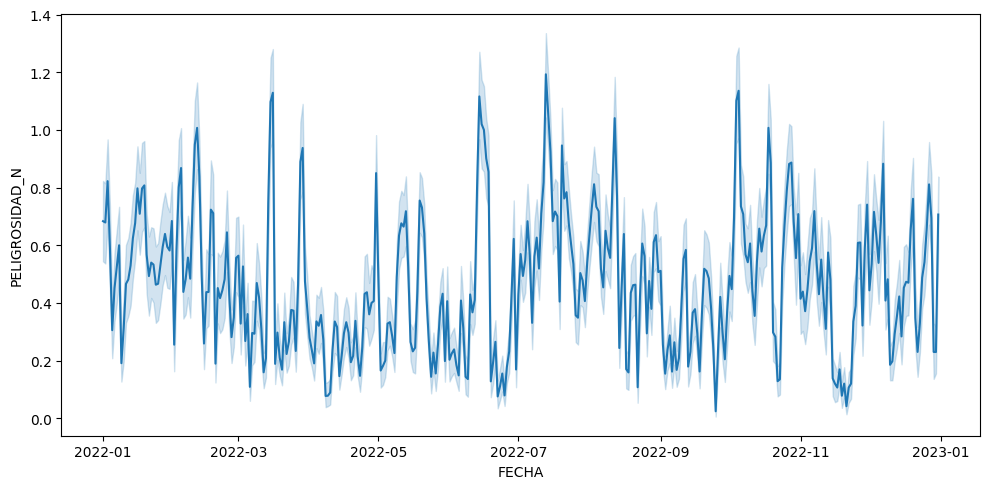

In [10]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)

plt.tight_layout()
plt.show()

### Comentario para explicar la grafica de arriba

### **Analysis Time Series**

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_df, period = 7)
decomposition

**Trend graph**

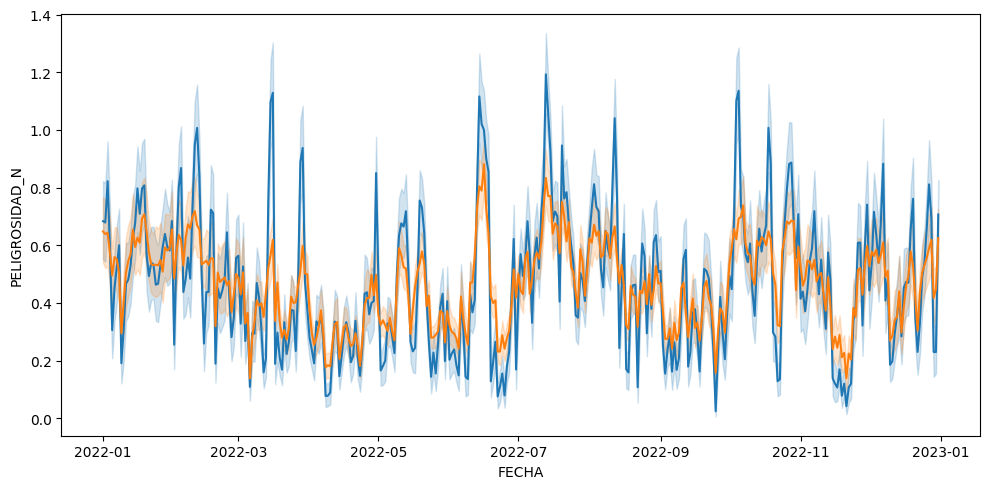

In [12]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

**Seasonal graph**

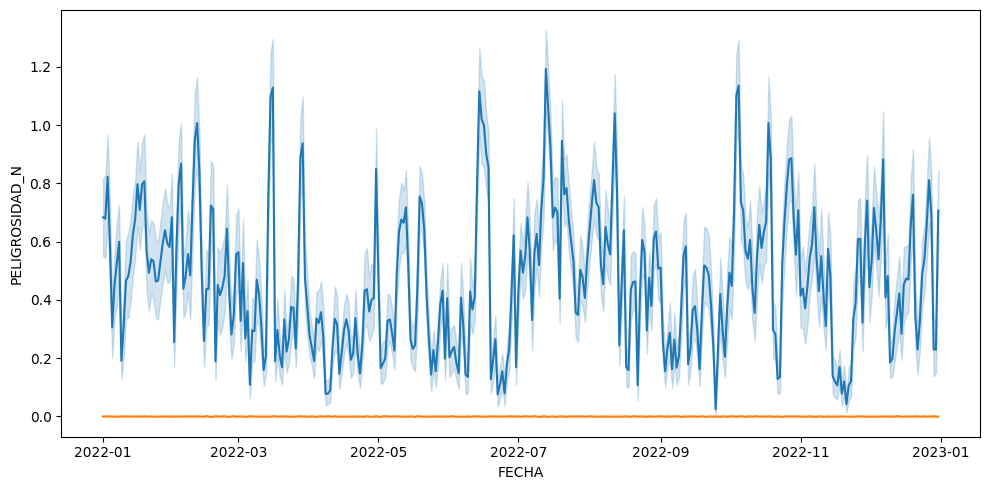

In [13]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Dickey-Fuller test results:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

test_stationarity(ts_df)

Dickey-Fuller test results:


Test Statistic                -9.098139e+00
p-value                        3.667213e-15
#Lags Used                     5.800000e+01
Number of Observations Used    5.387200e+04
Critical Value (1%)           -3.430471e+00
Critical Value (5%)           -2.861594e+00
Critical Value (10%)          -2.566799e+00
dtype: float64

**Es estacionaria**

### **Variability analysis**

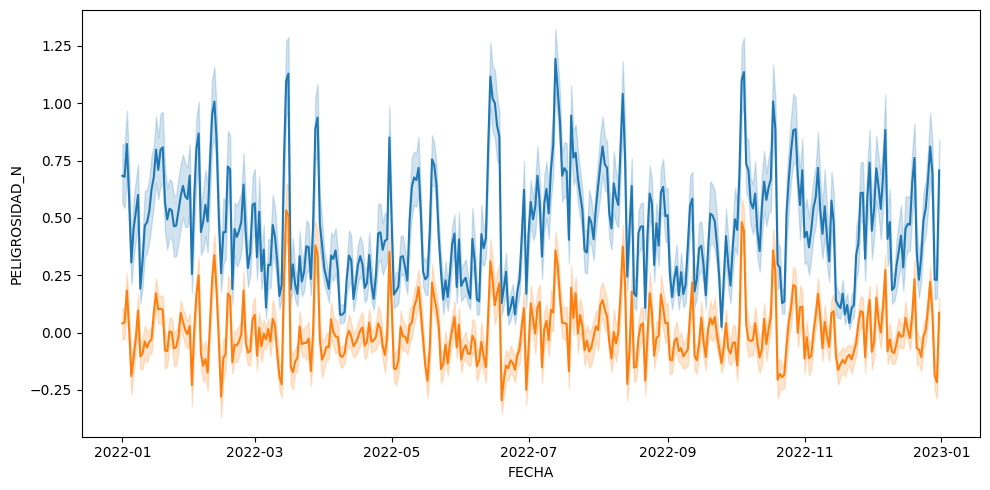

In [15]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_df)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

### **Autocorrelation analysis**

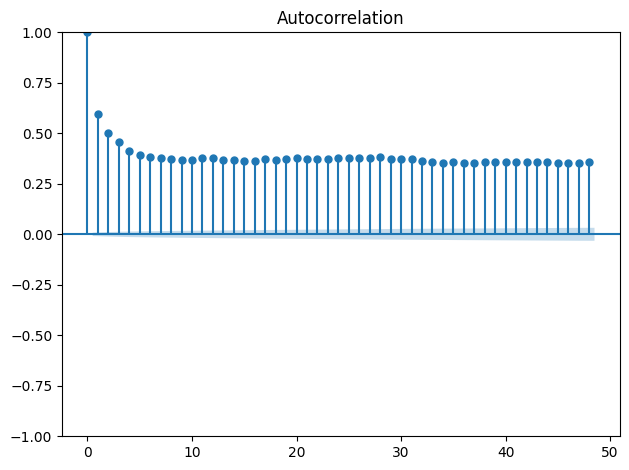

In [16]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_df)

plt.tight_layout()

plt.show()

*Ya es estacionaria, no hace falta hacer transformacion para tratarlo como tal*

In [17]:
from pmdarima import auto_arima

model = auto_arima(ts_df, seasonal= True, trace= True, m= 7,
                   start_p=0, max_p=3,
                   start_q=0, max_q=3,
                   start_P=0, max_P=2,
                   start_Q=0, max_Q=2,
                   d=1, D=1,
                   stepwise= True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=143912.953, Time=1.41 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=119886.902, Time=7.49 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=32.92 sec


: 

In [ ]:
# from pickle import dump

# # Save the model to a file named "arima.pk"
# dump(model, open('../models/arima.pk', 'wb'))

In [ ]:
# model.summary()

In [ ]:
# forecast = model.predict(20)
# forecast

In [ ]:
# fig, axis = plt.subplots(figsize = (10, 5))

# sns.lineplot(data = ts_df)
# sns.lineplot(data = forecast, c = "green")

# plt.tight_layout()

# plt.show()